# Customer's concern areas (Using Python)

In [1]:
%matplotlib inline
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

### Cusomter's concern areas
- Extract bigrams
- Identify negative words
- Extract bigrams containing negative words

### Clean data at sentence level

In [2]:
reviews = pd.read_csv('amazon_reviews.csv')

In [3]:
reviews.shape

(999, 10)

In [4]:
text_col = reviews['reviewText']

text_col = text_col.fillna(' ').str.lower()

text_col = text_col.str.replace('[^a-z ]', '')

stop_words = nltk.corpus.stopwords.words('english')
custom_stop_words = ['get', 'would', 'told']
stop_words.extend(custom_stop_words)

#### Get back sentence by joining words

In [5]:
docs_clean = []
for row in text_col:
    words = np.array(nltk.word_tokenize(row))
    words = [word for word in words if word not in stop_words]
    docs_clean.append(' '.join(words))
docs_clean[0]

'got gps husband otr road trucker impressed shipping time arrived days earlier expected within week use however started freezing could glitch unit worked great worked work great normal person well trucker option big truck routes tells scale coming ect love bigger screen ease use ease putting addresses memory nothing really bad say unit exception freezing probably one million thats luck contacted seller within minutes email received email back instructions exchange impressed way around'

### Build Corpus

In [6]:
model = CountVectorizer(ngram_range=(2,2)) # Create a model
sparse_matrix = model.fit_transform(docs_clean) # Fit the data to the model

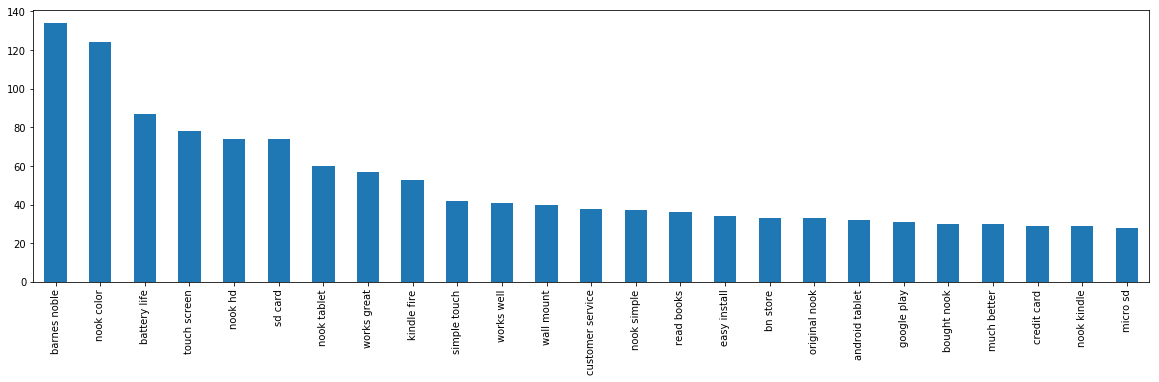

In [7]:
dtm = pd.DataFrame(sparse_matrix.toarray(), columns=model.get_feature_names())

dtm.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5)) 

In [8]:
bigrams = dtm.columns
bigrams[:10]

Index(['aaa batteries', 'aac soundtracks', 'abandoning normal',
       'abilities aware', 'abilities full', 'abilities screen',
       'abilities stripped', 'ability add', 'ability books', 'ability borrow'],
      dtype='object')

In [9]:
negative_words = ['poor', 'waste', 'bad',
                   'defective', 'disgusting', 'untrusty',
                   'worst', 'horrible', 'unexpectedly','slow','horrible']

In [10]:
bigrams_imp = []
for bigram in bigrams:
    words = bigram.split(' ')
    if sum(np.in1d(words, negative_words))>=1:
        bigrams_imp.append(bigram)

In [15]:
sum(np.in1d(['amazing','camera'],negative_words))

0

In [14]:
len(bigrams_imp)

263

In [17]:
bigrams_imp[:10]

['absolute waste',
 'apps poor',
 'bad allcons',
 'bad anything',
 'bad book',
 'bad boys',
 'bad burning',
 'bad buy',
 'bad called',
 'bad cell']

In [18]:
dtm_subset = dtm[bigrams_imp]

In [16]:
dtm_subset.shape

(999, 263)

In [19]:
dtm_subset.sum().sort_values(ascending=False).head(30)

waste money                 6
isnt bad                    5
slow respond                4
bad really                  3
bad reviews                 3
bad say                     3
little slow                 3
poor contrast               3
poor customer               2
bad experience              2
screen slow                 2
bad unit                    2
bad thing                   2
excruciatingly slow         2
os horrible                 2
bit slow                    2
bad nook                    2
slow clunky                 2
nothing bad                 2
defective nook              2
pretty poor                 2
responsibility defective    2
time slow                   2
good bad                    2
incredibly slow             2
poor quality                2
go bad                      2
bad buy                     2
going bad                   2
defective kept              1
dtype: int64